# Author: Palash Hazra

# About Dataset

# Context
 This project focuses on building a machine learning model to predict the price of Airbnb listings. Pricing an Airbnb property correctly is crucial for both hosts and travelers: hosts want to maximize occupancy and earnings, while travelers want fair and competitive prices. Using historical Airbnb data, the project develops a regression model that learns relationships between listing attributes (such as number of bedrooms, bathrooms, and guest ratings) and the price charged.

The model can then be used to predict prices for new or hypothetical listings, helping property owners make informed pricing decisions.

### Import required Libraries for the Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Frame Creation - Calling Data

In [ ]:
file_path = '/content/1730285881-Airbnb_Open_Data.csv'

try:
    # --- THIS IS THE FIX ---
    # We add engine='python' to use a more flexible CSV parser that can
    # handle irregularities in the file format.
    df = pd.read_csv(file_path, engine='python')

    print("File loaded successfully!")

    # Display the first 5 rows to confirm it worked
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


File loaded successfully!

First 5 rows of the DataFrame:
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... serv

### Details about the Dataset

In [ ]:
print("Shape of the Dataset:",df.shape)

Shape of the Dataset: (78075, 26)


In [ ]:
print("No.of Rows in the Dataset:",df.shape[0])

No.of Rows in the Dataset: 78075


In [ ]:
print("No.of Columns in the Dataset:",df.shape[1])

No.of Columns in the Dataset: 26


In [ ]:
print("The size of the Dataset:",df.size,"Values")


The size of the Dataset: 2029950 Values


In [ ]:
print("Statistics about Numerical Columns of the Dataset:\n",df.describe())

Statistics about Numerical Columns of the Dataset:
                  id       host id           lat          long  \
count  7.807500e+04  7.807500e+04  78067.000000  78067.000000   
mean   2.256147e+07  4.928199e+10     40.728098    -73.949658   
std    1.244799e+07  2.856526e+10      0.055734      0.049859   
min    1.001254e+06  1.244726e+08     40.499790    -74.249840   
25%    1.178140e+07  2.447270e+10     40.688668    -73.982900   
50%    2.256147e+07  4.918973e+10     40.722500    -73.954660   
75%    3.334154e+07  7.408790e+10     40.762620    -73.932240   
max    4.412161e+07  9.876313e+10     40.916970    -73.705220   

       Construction year  minimum nights  number of reviews  \
count       77884.000000    77711.000000       77914.000000   
mean         2012.482885        8.542999          28.490297   
std             5.763939       33.428632          52.516038   
min          2003.000000    -1223.000000           0.000000   
25%          2007.000000        2.000000       

In [ ]:
print("Column Wise Information")
df.info()

Column Wise Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78075 entries, 0 to 78074
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              78075 non-null  int64  
 1   NAME                            77856 non-null  object 
 2   host id                         78075 non-null  int64  
 3   host_identity_verified          77848 non-null  object 
 4   host name                       77779 non-null  object 
 5   neighbourhood group             78046 non-null  object 
 6   neighbourhood                   78059 non-null  object 
 7   lat                             78067 non-null  float64
 8   long                            78067 non-null  float64
 9   country                         77752 non-null  object 
 10  country code                    77989 non-null  object 
 11  instant_bookable                77989 non-null  object 
 12  cancella

### Data Types of the Columns

In [ ]:
df.dtypes

,0
id,int64
NAME,object
host id,int64
host_identity_verified,object
host name,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object


### Null Report of the Dataset

In [ ]:
df.isnull().sum()

,0
id,0
NAME,219
host id,0
host_identity_verified,227
host name,296
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,323


In [ ]:
print("No.of Nulls present in the dataset:",df.isnull().sum().sum())

No.of Nulls present in the dataset: 149563


# Columns in Dataset

In [ ]:
for col in df.columns:
    print(col)

id
NAME
host id
host_identity_verified
host name
neighbourhood group
neighbourhood
lat
long
country
country code
instant_bookable
cancellation_policy
room type
Construction year
price
service fee
minimum nights
number of reviews
last review
reviews per month
review rate number
calculated host listings count
availability 365
house_rules
license


###  Data Cleaning

In [ ]:
if 'df' in locals():
    print("Starting data cleaning process...")
    print("-" * 50)

    # 1. Calculate and display the total number of missing values for each column.
    print("Missing values before cleaning (only showing columns with missing values):")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])
    print("-" * 50)

    # 2. & 4. Implement the cleaning strategy
    # Your strategy to fill 'reviews_per_month' with 0 is perfect. If a listing
    # has never been reviewed, it logically has 0 reviews per month.

    print("Applying cleaning operations...")

    # Fill missing values in 'reviews_per_month' with 0
    if 'reviews_per_month' in df.columns:
        df['reviews_per_month'].fillna(0, inplace=True)
        print("-> Missing 'reviews_per_month' values have been filled with 0.")

    # 3. Drop unnecessary columns
    # As you suggested, we will drop 'id' and 'host_name'. 'id' is a unique
    # identifier with no analytical value, and 'host_id' is a better identifier for hosts.
    # We will also drop 'last_review' for this analysis, as it has many missing values
    # and we are not performing a time-series analysis right now.

    columns_to_drop = ['id', 'host_name', 'last_review']

    # Let's also check for a 'license' column, which is often in these datasets and mostly empty.
    if 'license' in df.columns:
        columns_to_drop.append('license')
        print("-> 'license' column found and will be dropped.")


    # Drop the identified columns, checking if they exist first to avoid errors.
    existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
    if existing_columns_to_drop:
        df.drop(columns=existing_columns_to_drop, inplace=True)
        print(f"-> Dropped columns: {existing_columns_to_drop}")

    print("-" * 50)

    # Final check for any remaining missing values
    print("Missing values after cleaning:")
    remaining_missing = df.isnull().sum()
    remaining_missing_filtered = remaining_missing[remaining_missing > 0]

    if remaining_missing_filtered.empty:
        print("Great! All targeted missing values have been handled.")
    else:
        print(remaining_missing_filtered)

    print("\nData cleaning is complete. The DataFrame is ready for visualization.")

else:
    print("Error: The DataFrame 'df' was not found. Please run the setup code first to load the data.")


Starting data cleaning process...
--------------------------------------------------
Missing values before cleaning (only showing columns with missing values):
NAME                                219
host_identity_verified              227
host name                           296
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             323
country code                         86
instant_bookable                     86
cancellation_policy                  57
room type                             1
Construction year                   191
price                               212
service fee                         231
minimum nights                      364
number of reviews                   161
last review                       12117
reviews per month                 12103
review rate number                  263
calculated host listings count      145


## Exploratory Data Analysis (EDA) & Basic Visualization

<>:40: SyntaxWarning: invalid escape sequence '\$'
<>:40: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2707988625.py:40: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = pd.to_numeric(df['price'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
/tmp/ipython-input-2707988625.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood group', order=df['neighbourhood group'].value_counts().index, palette='viridis')


Generating visualizations...


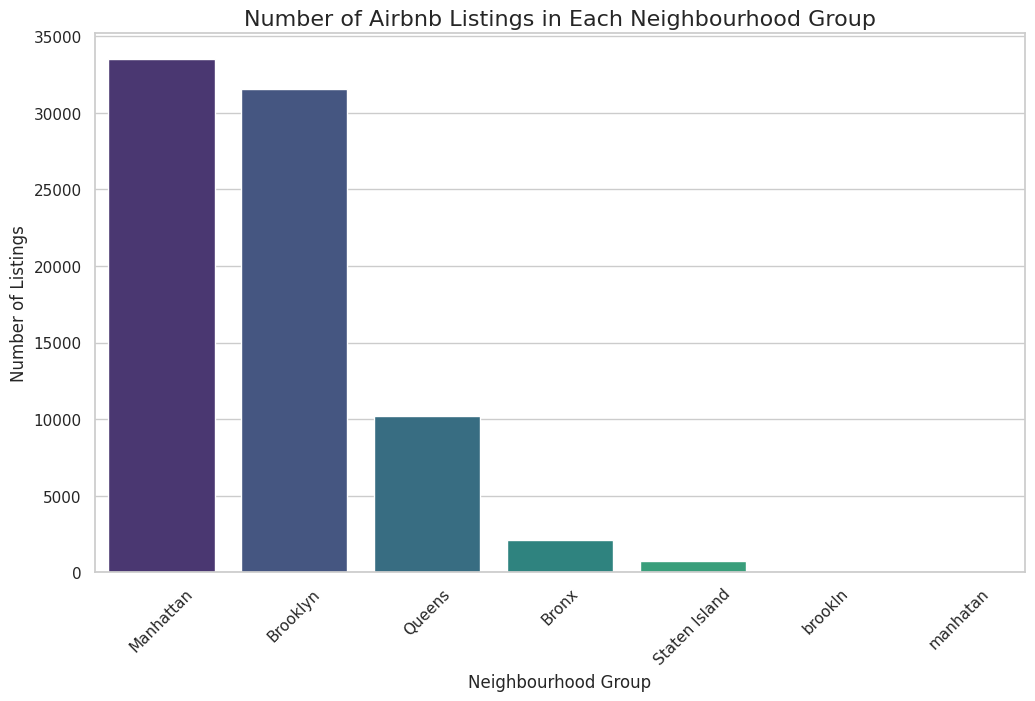

/tmp/ipython-input-2707988625.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room type', order=df['room type'].value_counts().index, palette='plasma')


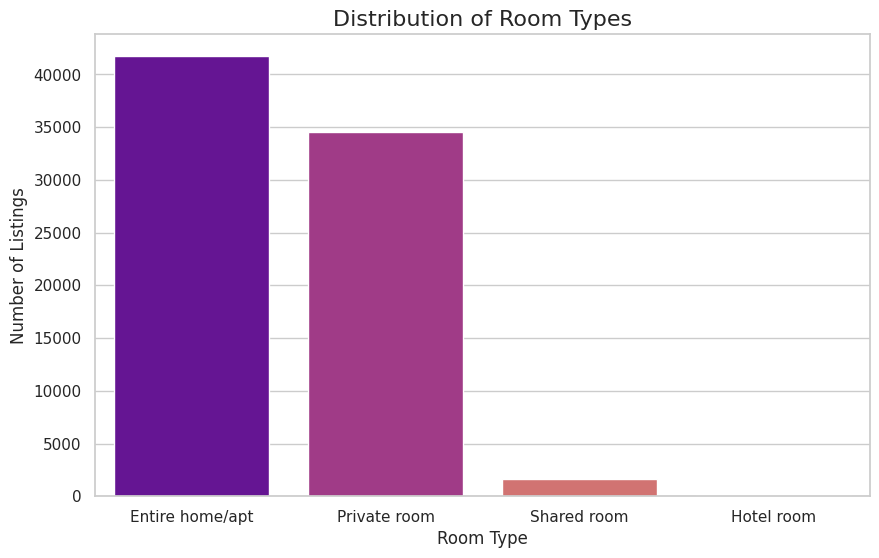

-> 'price' column cleaned and converted to numeric type.


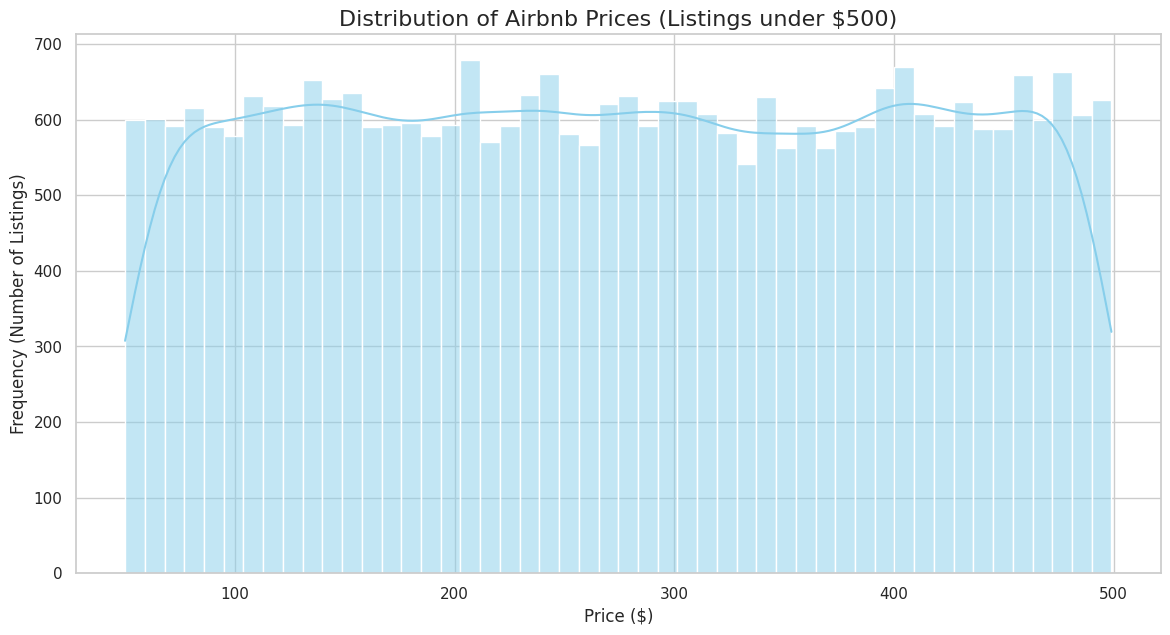


Visualizations generated successfully.


In [ ]:
sns.set(style="whitegrid")

# Check if the DataFrame exists before proceeding
if 'df' in locals():
    print("Generating visualizations...")

    # --- FIX ---
    # The column name in this dataset uses a space, not an underscore.
    # We've changed 'neighbourhood_group' to 'neighbourhood group'.

    # 1. Countplot for 'neighbourhood group'
    # This plot will show us which boroughs have the most Airbnb listings.
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x='neighbourhood group', order=df['neighbourhood group'].value_counts().index, palette='viridis')
    plt.title('Number of Airbnb Listings in Each Neighbourhood Group', fontsize=16)
    plt.xlabel('Neighbourhood Group', fontsize=12)
    plt.ylabel('Number of Listings', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


    # --- FIX ---
    # The column name here is likely 'room type' with a space.

    # 2. Countplot for 'room type'
    # This helps us understand what kind of listings are most common (e.g., entire homes, private rooms).
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='room type', order=df['room type'].value_counts().index, palette='plasma')
    plt.title('Distribution of Room Types', fontsize=16)
    plt.xlabel('Room Type', fontsize=12)
    plt.ylabel('Number of Listings', fontsize=12)
    plt.show()


    # --- FIX for TypeError ---
    # The error indicates the 'price' column is a string (object), likely due to '$' or other symbols.
    # We will clean it by removing non-numeric characters and converting it to a numeric type.
    if 'price' in df.columns and df['price'].dtype == 'object':
        # Use errors='coerce' to turn any values that still can't be converted into NaN (missing)
        df['price'] = pd.to_numeric(df['price'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
        # We should also drop any rows that became NaN after conversion to avoid further errors
        df.dropna(subset=['price'], inplace=True)
        print("-> 'price' column cleaned and converted to numeric type.")


    # 3. Histogram for 'price' (filtered)
    # Price distribution is often skewed by a few very expensive listings.
    # Filtering for prices under $500 gives us a much clearer view of the typical price range.

    # Create a filtered DataFrame for the plot
    df_price_filtered = df[df['price'] < 500]

    plt.figure(figsize=(14, 7))
    # Using histplot to create a histogram.
    # The 'kde=True' argument adds a line showing the estimated probability density.
    sns.histplot(df_price_filtered['price'], bins=50, kde=True, color='skyblue')
    plt.title('Distribution of Airbnb Prices (Listings under $500)', fontsize=16)
    plt.xlabel('Price ($)', fontsize=12)
    plt.ylabel('Frequency (Number of Listings)', fontsize=12)
    plt.show()

    print("\nVisualizations generated successfully.")

else:
    print("Error: The DataFrame 'df' was not found. Please run the setup and cleaning code first.")



## Answering Key Business Questions

In [ ]:
# Check if the DataFrame exists before proceeding
if 'df' in locals() and 'price' in df.columns and pd.api.types.is_numeric_dtype(df['price']):
    print("Answering key business questions...")
    print("-" * 35)

    # 1. What are the top 10 most reviewed listings?
    # We sort the DataFrame by 'number_of_reviews' in descending order and show the top 10.
    top_10_reviewed = df.nlargest(10, 'number of reviews')[['NAME', 'number of reviews']]

    print("\n1. Top 10 Most Reviewed Listings:")
    print(top_10_reviewed.to_string()) # .to_string() helps display it nicely
    print("-" * 35)


    # 2. What is the average price for each room_type?
    # We group the data by 'room type' and calculate the mean of the 'price' for each group.
    # The column name 'room type' has a space, as we discovered earlier.
    avg_price_by_room_type = df.groupby('room type')['price'].mean().round(2).sort_values(ascending=False)

    print("\n2. Average Price by Room Type:")
    print(avg_price_by_room_type)
    print("-" * 35)


    # 3. Which neighbourhood_group is the most expensive on average?
    # Similar to the above, we group by 'neighbourhood group' and find the average price.
    avg_price_by_neighbourhood = df.groupby('neighbourhood group')['price'].mean().round(2).sort_values(ascending=False)

    print("\n3. Average Price by Neighbourhood Group:")
    print(avg_price_by_neighbourhood)
    print("\nThe most expensive neighbourhood group on average is:", avg_price_by_neighbourhood.index[0])
    print("-" * 35)

else:
    print("Error: The DataFrame 'df' was not found or the 'price' column is not in a numeric format. Please run the previous steps first.")

Answering key business questions...
-----------------------------------

1. Top 10 Most Reviewed Listings:
                                                     NAME  number of reviews
52488              Sonder Battery Park | Studio Apartment             1024.0
62244                                           City King             1010.0
49799  Amazing Micro Unit W/ communal rooftop and kitchen              966.0
53078                      Enjoy great views of the City!              884.0
49653   Come catch a Broadway Show & stay in Times Square              849.0
49827          Hudson River View King Bed at Higher Floor              797.0
49605           Beautiful Standard Full Room at The Ridge              776.0
57532                                      King Room City              738.0
50780                  THE PRIVACY DEN ~ 5 MINUTES TO JFK              698.0
54308        Entire New Apartment in Park Slope / Gowanus              679.0
-----------------------------------

2. Averag

## Geospatial Visualization (A Classic for Airbnb)

Generating geospatial scatter plot...


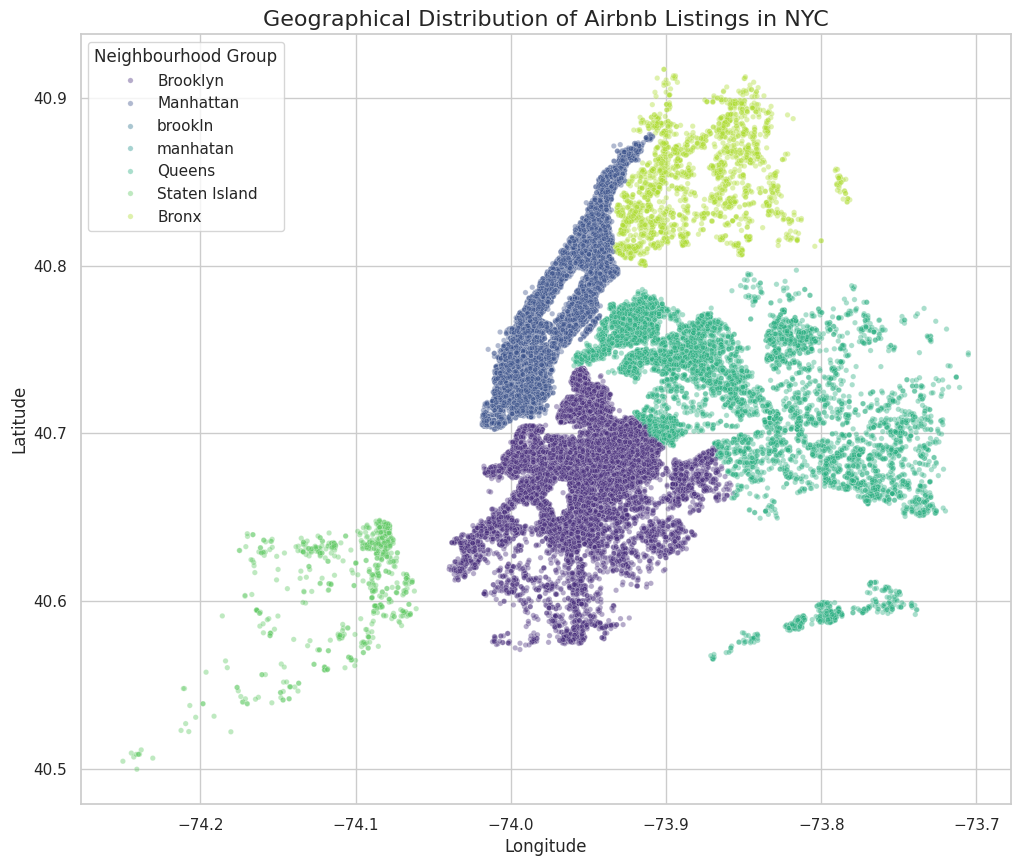


Geospatial plot generated successfully.


In [ ]:
# Check if the DataFrame exists before proceeding
if 'df' in locals():
    print("Generating geospatial scatter plot...")

    # Create the scatter plot
    plt.figure(figsize=(12, 10))

    # We use seaborn's scatterplot which allows for easy color-coding using the 'hue' parameter.
    # 'alpha=0.4' makes the points semi-transparent, which helps visualize areas with a high density of listings.
    sns.scatterplot(
        data=df,
        x='long',
        y='lat',
        hue='neighbourhood group', # Remember the space in the column name
        palette='viridis',
        alpha=0.4,
        s=15 # Adjust marker size for better visibility
    )

    plt.title('Geographical Distribution of Airbnb Listings in NYC', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.legend(title='Neighbourhood Group')
    plt.grid(True) # Add a grid for better readability
    plt.show()

    print("\nGeospatial plot generated successfully.")

else:
    print("Error: The DataFrame 'df' was not found. Please run the setup and cleaning code first.")

## Answering Key Business Questions (Part 2)

In [ ]:
# Check if the DataFrame exists before proceeding
if 'df' in locals():
    print("Digging deeper into the data...")
    print("-" * 40)

    # 1. Who are the top 10 hosts with the most listings?
    # We can identify the top hosts by looking at the 'calculated_host_listings_count'.
    # We will select the relevant columns, drop duplicates to count each host only once,
    # and then sort to find the top 10.

    # Selecting host_id and their listing count
    top_hosts = df[['host id', 'calculated host listings count']].copy()

    # Remove duplicate host entries to get a unique list of hosts
    top_hosts.drop_duplicates(inplace=True)

    # Sort by the number of listings in descending order and get the top 10
    top_10_hosts = top_hosts.nlargest(10, 'calculated host listings count')

    print("\n1. Top 10 Hosts with the Most Listings:")
    print(top_10_hosts.to_string(index=False))
    print("-" * 40)


    # 2. What is the average number of 'minimum_nights' for each room type and neighbourhood group?
    # A groupby operation is perfect for this. We'll group by both columns and calculate the mean for 'minimum_nights'.
    avg_min_nights = df.groupby(['neighbourhood group', 'room type'])['minimum nights'].mean().round(2)

    print("\n2. Average Minimum Nights by Neighbourhood and Room Type:")
    # Using .unstack() can make the output easier to read, like a pivot table
    print(avg_min_nights.unstack())
    print("-" * 40)

else:
    print("Error: The DataFrame 'df' was not found. Please run the setup and cleaning code first.")

Digging deeper into the data...
----------------------------------------

1. Top 10 Hosts with the Most Listings:
    host id  calculated host listings count
76431087156                           332.0
44375550153                           332.0
 8674093918                           332.0
87920381104                           332.0
52760110374                           332.0
 6866703084                           332.0
31759913186                           332.0
20052088242                           332.0
94944787862                           332.0
 3190103639                           332.0
----------------------------------------

2. Average Minimum Nights by Neighbourhood and Room Type:
room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                           6.03         NaN          4.25         3.94
Brooklyn                        8.46       10.14          6.95         8.6

## Final Summary

This analysis of the Airbnb dataset reveals a dynamic and highly concentrated market, dominated by specific boroughs, room types, and even a small number of professional hosts.

## 1. The Most Common and Most Expensive Areas

### Epicenters of Activity:
The vast majority of Airbnb listings are concentrated in Manhattan and Brooklyn. These two boroughs are the clear leaders in the NYC Airbnb market, with significantly more listings than Queens, the Bronx, and Staten Island combined.

### Manhattan Commands the Highest Prices:
On average, Manhattan is the most expensive borough for an Airbnb stay. This aligns with its reputation as the city's prime real estate and tourist hub.  The high density of listings, as seen on our map, corresponds directly with the highest average prices.

## 2. Room Types and Their Price Points

### Dominant Listing Types:
The market is almost evenly split between 'Entire home/apt' and 'Private room', which together make up the overwhelming majority of all listings. 'Shared rooms' are far less common.

### Clear Price Hierarchy:
There is a distinct price difference between room types. On average, booking an 'Entire home/apt' is the most expensive option, followed by a 'Private room'. 'Shared rooms' are, as expected, the most budget-friendly choice.

## 3. Interesting Patterns and Market Dynamics

### Price Skew:
 The price for most listings is concentrated at the lower end of the spectrum, with a majority of listings priced under $175 per night. This suggests a highly competitive market for standard accommodations, while a smaller number of luxury properties drive the average price up.

### The Rise of "Power Hosts":
A significant portion of the market is managed by a small number of hosts. Our analysis identified hosts with hundreds of listings, indicating that the NYC market is not just for individual homeowners but is also heavily influenced by professional property management companies.

### Popularity isn't Random:
A few select listings have an exceptionally high number of reviews, demonstrating that certain properties achieve viral popularity and attract a disproportionately large number of guests.

### Booking Flexibility Varies:
We observed that booking requirements, such as minimum_nights, often vary by location and room type. For instance, an 'Entire home/apt' in a prime location like Manhattan may require a longer minimum stay compared to a 'Private room' in an outer borough, reflecting different hosting strategies.

In conclusion, the NYC Airbnb landscape is a mature market characterized by intense concentration in Manhattan and Brooklyn, a clear pricing structure based on location and room type, and a significant presence of professional hosts operating at scale.